# Hands-on 2: kNN Notebook (Tutorial)



---



Por: **Cesar Balam Espinosa Nuñez**

Para la materia: **Clasificación inteligente de datos**



---




## 1 Fundamentos de la técnica

kNN (k-Nearest Neighbors) es un algoritmo de aprendizaje supervisado que puede realizar tanto clasificación como regresión.

Se basa en un principio muy intuitivo, cuando se agrega un nuevo punto a los datos, este se cataloga en la clase que predomine más entre sus "k" vecinos más cercanos, estos vecinos son los datos del conjunto de entrenamiento.

Esta cercanía se determina calculando la distancia entre los puntos, la cual puede ser ya sea Euclidiana, Manhattan, Chebyshev, etc. Dependiendo de cual se acople mejor a las necesidades.




---



## 2 Modelo Matemático

Dado un conjunto de entrenamiento:

$$ D = \{ (x_1, y_1), (x_2, y_2), ..., (x_n, y_n) \} $$

donde **$ x_i \in \mathbb{R}^m $** representa un vector de características y **$ y_i $** la clase correspondiente.

Para clasificar un nuevo punto **$ x $**:
1. Se calcula la distancia euclidiana a todos los puntos de entrenamiento:

$$ d(x, x_i) = \sqrt{\sum_{j=1}^{m} (x_j - x_{ij})^2} $$

2. Se seleccionan los k puntos más cercanos.
3. Se asigna la clase que ocurra con mayor frecuencia entre esos vecinos:

$$ \hat{y} = \text{mode}(y_{(1)}, y_{(2)}, ..., y_{(k)}) $$    



---




## 3 Descripción de la librería y funciones usadas
- **numpy:** para operaciones matemáticas y manejo de arreglos.
- **pandas:** para manipular datasets como tablas.
- **matplotlib:** para visualización de datos.
- **seaborn:** para visualizaciones especificas.
- **scikit-learn (sklearn):**
  - `datasets`: para generar conjuntos de datos de prueba.
  - `model_selection.train_test_split`: para dividir los datos.
  - `preprocessing.StandardScaler`: para estandarizar las características de los datos.
  - `neighbors.KNeighborsClassifier`: Implementa el modelo kNN para clasificación.
  - `metrics.confusion_matrix`: Crea la matriz de confusión.  
  - `metrics.accuracy_score`: Calcula el porcentaje de aciertos.
    



---



## 4 Pipeline

### 4.1 Preprocessing

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Cargar el dataset iris
iris = load_iris()

# División de los datos en columnas de entrada (X) y objetivo (Y)
X = iris.data # Características (features)
Y = iris.target # Objetivo (target/clase)

# Crear el DataFrame de Pandas para el análisis y visualización
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = Y

# Añadir la columna con los nombres de las categorías (para legibilidad)
df['target_name'] = [iris.target_names[i] for i in Y]

# Estadísticas básicas
print("Estadísticas descriptivas:")
# Mostrar solo las columnas de características
display(df.iloc[:, :-2].describe())

# Distribución de clases
print("\nDistribución de Clases:")
print(df['target_name'].value_counts())

Estadísticas descriptivas:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000



Distribución de Clases:
target_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


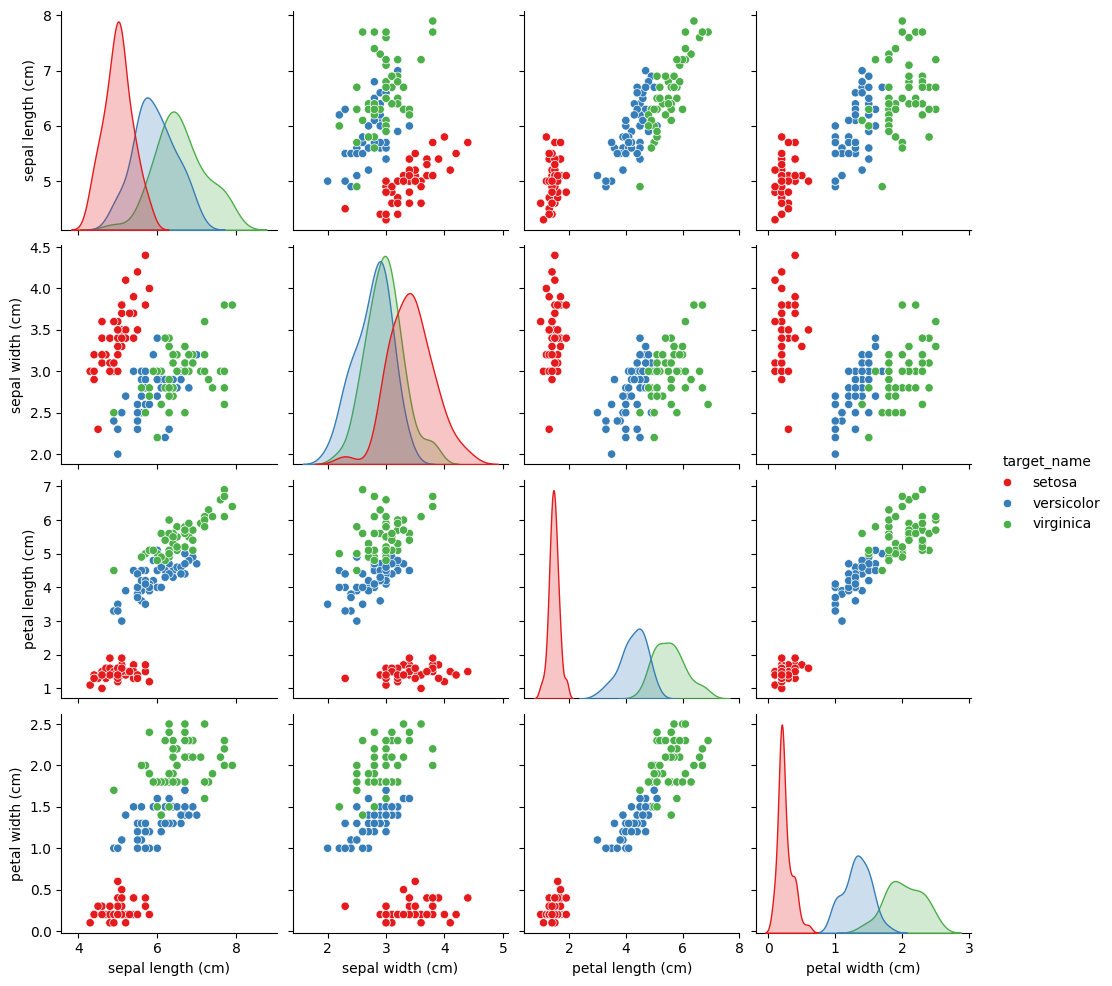

In [99]:
# Gráfico para mostrar diferentes dispersiones en base a las caracteristicas
sns.pairplot(df, hue='target_name', palette='Set1', vars=["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"])
plt.show()

### 4.2 Feature Engineering

In [100]:
"""

Los categorias versicolor y virginica se sobreponen bastante pero esto aplica para todos los casos.
Determino que deberia usar petal length y petal width ya que en en su scatter chart es la combinacion de entradas que menos sobrepone estas dos categorias.
Ademas, la alta desviación estándar general (std) en petal length y petal width sugiere que estas características tienen un rango de valores muy amplio.
Esto generalmente indica que la diferencia en las medias de estas características entre las tres clases es muy grande.
Lo que las hace buenas para la clasificacion.

"""

# Caracteristicas escojidas en base al pairplot
selected_features = ["petal length (cm)", "petal width (cm)"]

# Convertir los dataframes a values para usar en el modelo
X_features = df[selected_features].values
Y_target = df['target'].values

# Dividir dataset: entrenamiento (70%) y prueba (30%)
X_train, X_test, Y_train, Y_test = train_test_split(
    X_features, Y_target, test_size=0.3, random_state=32, stratify=Y_target
)

# Escalado de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 4.3 Prediction

El patrón [1.2, 0.3] pertenece a la clase: 'setosa'


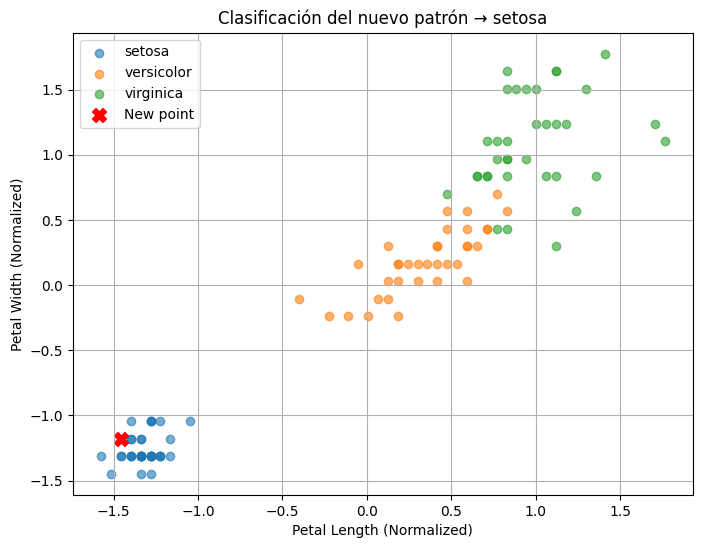

El patrón [3.7, 1.2] pertenece a la clase: 'versicolor'


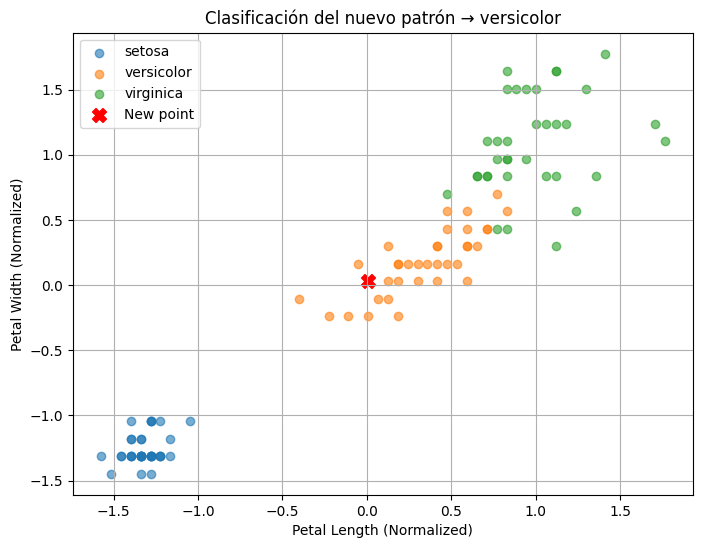

El patrón [5.6, 2.4] pertenece a la clase: 'virginica'


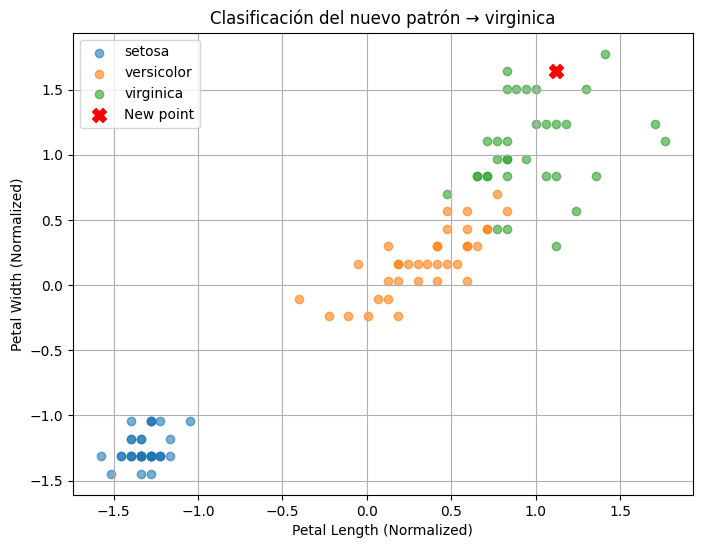

In [101]:
# Entrenar el modelo
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled, Y_train)

# Función para clasificar y mostrar el resultado gráficamente
def clasify_case(pattern):
    scaled_pattern = scaler.transform([pattern])
    prediction = model.predict(scaled_pattern)
    class_ = iris.target_names[prediction[0]]

    # Imprimir el resultado
    print(f"El patrón {pattern} pertenece a la clase: '{class_}'")

    # Gráfico de dispersión (usando las dos características seleccionadas)
    plt.figure(figsize=(8,6))
    for i, especie in enumerate(iris.target_names):
        plt.scatter(
            X_train_scaled[Y_train==i, 0],
            X_train_scaled[Y_train==i, 1],
            label=especie,
            alpha=0.6
        )

    # Agregar el nuevo patrón clasificado
    plt.scatter(
        scaled_pattern[0, 0], scaled_pattern[0, 1],
        color='red', marker='X', s=100, label='New point'
    )

    plt.xlabel('Petal Length (Normalized)')
    plt.ylabel('Petal Width (Normalized)')
    plt.title(f'Clasificación del nuevo patrón → {class_}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Ejemplo
clasify_case([1.2, 0.3])
clasify_case([3.7, 1.2])
clasify_case([5.6, 2.4])

### 4.4 Model Evaluation

Exactitud del modelo: 97.78%


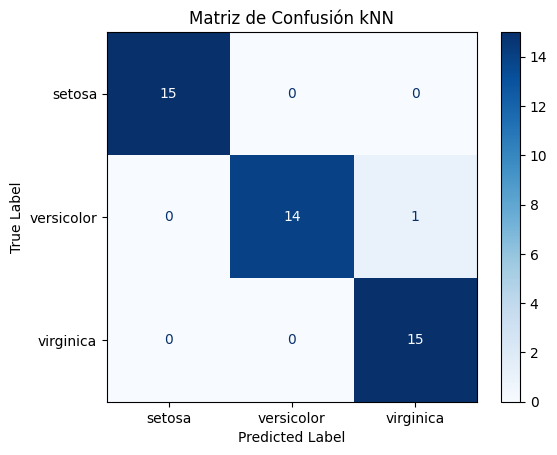

In [102]:
# Calculo de exactitud de las predicciones del modelo
Y_pred = model.predict(X_test_scaled)
acc = accuracy_score(Y_test, Y_pred)
print(f"Exactitud del modelo: {acc*100:.2f}%")

# Matriz de confusion (TP, TN, FP, FN)
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)

# Graficar plot completo con la matriz de confusion y labels
plt.title("Matriz de Confusión kNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



El modelo permitio identificar el 97.78% de los inputs de prueba correctamente.

Cometió 1 Falsos Positivos (FP) para la clase virginica, ya que clasificó incorrectamente 1 instancia de versicolor como virginica.

Pero esto especificamente con el random state 32 de la division de los datos.

## 5 Referencias Bibliográficas

- K-nearest neighbor(KNN) algorithm. (2017, abril 14). GeeksforGeeks. https://www.geeksforgeeks.org/machine-learning/k-nearest-neighbours/

- Implementation of KNN classifier using Scikit - learn - Python. (2019, mayo 23). GeeksforGeeks. https://www.geeksforgeeks.org/machine-learning/ml-implementation-of-knn-classifier-using-sklearn/

- ¿Qué es el algoritmo KNN? (2025, octubre 7). Ibm.com. https://www.ibm.com/mx-es/think/topics/knn

- KNeighborsClassifier. (s/f). Scikit-Learn. Recuperado el 5 de noviembre de 2025, de https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


    